# <u> Problem </U>
## We attempt to classify real youtube (artist videos) comments as spam or not spam.
### Using datasets: youtube-spam-dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
import keras
from keras import Sequential
from keras.layers import Dense
from keras.losses import *
from keras.optimizers import *
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, log_loss
from keras.metrics import categorical_crossentropy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
path = "/Users/aaditkapoor/Desktop/youtube-spam-dataset"
data1 = pd.read_csv(path+"/1.csv")
data2 = pd.read_csv(path+"/2.csv")
data3 = pd.read_csv(path+"/3.csv")
data4 = pd.read_csv(path+"/4.csv")

# The combined data
data = pd.concat([data1, data2, data3, data4])

In [4]:
data.shape

(1586, 5)

In [5]:
data1.shape

(350, 5)

In [6]:
data2.shape

(350, 5)

In [7]:
data3.shape

(438, 5)

In [8]:
data4.shape

(448, 5)

In [9]:
data.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [10]:
# Removing useless columns
data.drop(columns=['COMMENT_ID','AUTHOR','DATE'], axis=1, inplace=True)

In [11]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


- 1 is positive(spam) and 0 is negative(not spam)

In [12]:
features = data.CONTENT.values
labels = data.CLASS.values
labels = to_categorical(labels)

In [13]:
# Vectorizing data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(features)
features = tokenizer.texts_to_matrix(features, mode='tfidf')

In [14]:
features.shape # 4377 as input_dim we can also reduce it.

(1586, 4377)

In [15]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'accuracy (feature use %)')

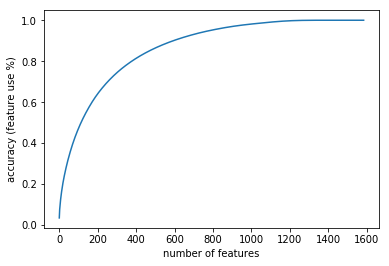

In [16]:
# Plotting
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of features")
plt.ylabel("accuracy (feature use %)")

In [27]:
# We will test pca afterwards on text data
# TODO
pca = PCA(n_components=1400)
features = pca.fit_transform(features)

In [60]:
# Creating custom callback
class StopAtHundered(keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        if logs.get('acc') == 1.0:
            print ("Stopped")
            print ("Accuracy is:", logs.get('acc'))
            model.is_training = False



custom = StopAtHundered()

In [61]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=3, shuffle=True)

In [65]:
# Building
model = Sequential()
model.add(Dense(100, activation="relu", input_dim=features_train.shape[1]))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['acc'])

In [58]:
tensorboard = TensorBoard(log_dir='./youtube_spam_ham_logs')

In [66]:
# Fitting
history = model.fit(features_train, labels_train, epochs=1000, batch_size=512, callbacks=[tensorboard, custom], validation_data=(features_test, labels_test))

Train on 1189 samples, validate on 397 samples
Epoch 1/1000
1189/1189 [==============================] - 0s 182us/step - loss: 0.6897 - acc: 0.6022 - val_loss: 0.6664 - val_acc: 0.5164
Epoch 2/1000
1189/1189 [==============================] - 0s 50us/step - loss: 0.5936 - acc: 0.5854 - val_loss: 0.6462 - val_acc: 0.5390
Epoch 3/1000
1189/1189 [==============================] - 0s 54us/step - loss: 0.5173 - acc: 0.7418 - val_loss: 0.5939 - val_acc: 0.7028
Epoch 4/1000
1189/1189 [==============================] - 0s 50us/step - loss: 0.4326 - acc: 0.9596 - val_loss: 0.5410 - val_acc: 0.8338
Epoch 5/1000
1189/1189 [==============================] - 0s 47us/step - loss: 0.3484 - acc: 0.9916 - val_loss: 0.4823 - val_acc: 0.8690
Epoch 6/1000
1189/1189 [==============================] - 0s 39us/step - loss: 0.2568 - acc: 0.9958 - val_loss: 0.4150 - val_acc: 0.8766
Epoch 7/1000
1189/1189 [==============================] - 0s 38us/step - loss: 0.1692 - acc: 0.9975 - val_loss: 0.3500 - val_acc: 

1189/1189 [==============================] - 0s 39us/step - loss: 6.6306e-05 - acc: 1.0000 - val_loss: 0.2882 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 52/1000
1189/1189 [==============================] - 0s 39us/step - loss: 6.4796e-05 - acc: 1.0000 - val_loss: 0.2886 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 53/1000
1189/1189 [==============================] - 0s 39us/step - loss: 6.3390e-05 - acc: 1.0000 - val_loss: 0.2890 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 54/1000
1189/1189 [==============================] - 0s 40us/step - loss: 6.1991e-05 - acc: 1.0000 - val_loss: 0.2895 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 55/1000
1189/1189 [==============================] - 0s 40us/step - loss: 6.0582e-05 - acc: 1.0000 - val_loss: 0.2899 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 56/1000
1189/1189 [==============================] - 0s 40us/step - loss: 5.9286e-05 - acc: 1.0000 - val_loss: 0.2903 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 57/100

1189/1189 [==============================] - 0s 39us/step - loss: 2.4080e-05 - acc: 1.0000 - val_loss: 0.3075 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 101/1000
1189/1189 [==============================] - 0s 39us/step - loss: 2.3662e-05 - acc: 1.0000 - val_loss: 0.3078 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 102/1000
1189/1189 [==============================] - 0s 39us/step - loss: 2.3239e-05 - acc: 1.0000 - val_loss: 0.3082 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 103/1000
1189/1189 [==============================] - 0s 39us/step - loss: 2.2844e-05 - acc: 1.0000 - val_loss: 0.3085 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 104/1000
1189/1189 [==============================] - 0s 39us/step - loss: 2.2454e-05 - acc: 1.0000 - val_loss: 0.3088 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 105/1000
1189/1189 [==============================] - 0s 38us/step - loss: 2.2062e-05 - acc: 1.0000 - val_loss: 0.3092 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 1

1189/1189 [==============================] - 0s 39us/step - loss: 1.1511e-05 - acc: 1.0000 - val_loss: 0.3227 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 150/1000
1189/1189 [==============================] - 0s 39us/step - loss: 1.1365e-05 - acc: 1.0000 - val_loss: 0.3229 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 151/1000
1189/1189 [==============================] - 0s 39us/step - loss: 1.1222e-05 - acc: 1.0000 - val_loss: 0.3232 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 152/1000
1189/1189 [==============================] - 0s 40us/step - loss: 1.1080e-05 - acc: 1.0000 - val_loss: 0.3234 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 153/1000
1189/1189 [==============================] - 0s 40us/step - loss: 1.0950e-05 - acc: 1.0000 - val_loss: 0.3237 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 154/1000
1189/1189 [==============================] - 0s 40us/step - loss: 1.0816e-05 - acc: 1.0000 - val_loss: 0.3239 - val_acc: 0.9320
Stopped
Accuracy is: 1.0
Epoch 1

1189/1189 [==============================] - 0s 42us/step - loss: 6.7486e-06 - acc: 1.0000 - val_loss: 0.3335 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 199/1000
1189/1189 [==============================] - 0s 42us/step - loss: 6.6820e-06 - acc: 1.0000 - val_loss: 0.3336 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 200/1000
1189/1189 [==============================] - 0s 40us/step - loss: 6.6205e-06 - acc: 1.0000 - val_loss: 0.3338 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 201/1000
1189/1189 [==============================] - 0s 40us/step - loss: 6.5566e-06 - acc: 1.0000 - val_loss: 0.3340 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 202/1000
1189/1189 [==============================] - 0s 40us/step - loss: 6.4980e-06 - acc: 1.0000 - val_loss: 0.3342 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 203/1000
1189/1189 [==============================] - 0s 41us/step - loss: 6.4369e-06 - acc: 1.0000 - val_loss: 0.3344 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 2

1189/1189 [==============================] - 0s 54us/step - loss: 4.4403e-06 - acc: 1.0000 - val_loss: 0.3418 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 248/1000
1189/1189 [==============================] - 0s 52us/step - loss: 4.4034e-06 - acc: 1.0000 - val_loss: 0.3420 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 249/1000
1189/1189 [==============================] - 0s 45us/step - loss: 4.3673e-06 - acc: 1.0000 - val_loss: 0.3421 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 250/1000
1189/1189 [==============================] - 0s 46us/step - loss: 4.3352e-06 - acc: 1.0000 - val_loss: 0.3423 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 251/1000
1189/1189 [==============================] - 0s 45us/step - loss: 4.2998e-06 - acc: 1.0000 - val_loss: 0.3424 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 252/1000
1189/1189 [==============================] - 0s 46us/step - loss: 4.2704e-06 - acc: 1.0000 - val_loss: 0.3426 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 2

1189/1189 [==============================] - 0s 46us/step - loss: 3.1319e-06 - acc: 1.0000 - val_loss: 0.3487 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 297/1000
1189/1189 [==============================] - 0s 41us/step - loss: 3.1140e-06 - acc: 1.0000 - val_loss: 0.3488 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 298/1000
1189/1189 [==============================] - 0s 45us/step - loss: 3.0922e-06 - acc: 1.0000 - val_loss: 0.3489 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 299/1000
1189/1189 [==============================] - 0s 60us/step - loss: 3.0706e-06 - acc: 1.0000 - val_loss: 0.3490 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 300/1000
1189/1189 [==============================] - 0s 51us/step - loss: 3.0517e-06 - acc: 1.0000 - val_loss: 0.3492 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 301/1000
1189/1189 [==============================] - 0s 55us/step - loss: 3.0352e-06 - acc: 1.0000 - val_loss: 0.3493 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 3

1189/1189 [==============================] - 0s 47us/step - loss: 2.3310e-06 - acc: 1.0000 - val_loss: 0.3543 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 346/1000
1189/1189 [==============================] - 0s 54us/step - loss: 2.3169e-06 - acc: 1.0000 - val_loss: 0.3544 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 347/1000
1189/1189 [==============================] - 0s 49us/step - loss: 2.3021e-06 - acc: 1.0000 - val_loss: 0.3545 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 348/1000
1189/1189 [==============================] - 0s 43us/step - loss: 2.2903e-06 - acc: 1.0000 - val_loss: 0.3546 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 349/1000
1189/1189 [==============================] - 0s 48us/step - loss: 2.2795e-06 - acc: 1.0000 - val_loss: 0.3547 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 350/1000
1189/1189 [==============================] - 0s 42us/step - loss: 2.2682e-06 - acc: 1.0000 - val_loss: 0.3548 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 3

1189/1189 [==============================] - 0s 50us/step - loss: 1.8077e-06 - acc: 1.0000 - val_loss: 0.3594 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 395/1000
1189/1189 [==============================] - 0s 43us/step - loss: 1.7970e-06 - acc: 1.0000 - val_loss: 0.3594 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 396/1000
1189/1189 [==============================] - 0s 44us/step - loss: 1.7882e-06 - acc: 1.0000 - val_loss: 0.3595 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 397/1000
1189/1189 [==============================] - 0s 59us/step - loss: 1.7800e-06 - acc: 1.0000 - val_loss: 0.3596 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 398/1000
1189/1189 [==============================] - 0s 61us/step - loss: 1.7723e-06 - acc: 1.0000 - val_loss: 0.3597 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 399/1000
1189/1189 [==============================] - 0s 55us/step - loss: 1.7649e-06 - acc: 1.0000 - val_loss: 0.3598 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 4

1189/1189 [==============================] - 0s 51us/step - loss: 1.4430e-06 - acc: 1.0000 - val_loss: 0.3635 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 444/1000
1189/1189 [==============================] - 0s 60us/step - loss: 1.4371e-06 - acc: 1.0000 - val_loss: 0.3636 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 445/1000
1189/1189 [==============================] - 0s 54us/step - loss: 1.4323e-06 - acc: 1.0000 - val_loss: 0.3637 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 446/1000
1189/1189 [==============================] - 0s 59us/step - loss: 1.4267e-06 - acc: 1.0000 - val_loss: 0.3638 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 447/1000
1189/1189 [==============================] - 0s 55us/step - loss: 1.4210e-06 - acc: 1.0000 - val_loss: 0.3638 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 448/1000
1189/1189 [==============================] - 0s 57us/step - loss: 1.4157e-06 - acc: 1.0000 - val_loss: 0.3639 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 4

1189/1189 [==============================] - 0s 57us/step - loss: 1.1774e-06 - acc: 1.0000 - val_loss: 0.3675 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 493/1000
1189/1189 [==============================] - 0s 67us/step - loss: 1.1735e-06 - acc: 1.0000 - val_loss: 0.3676 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 494/1000
1189/1189 [==============================] - 0s 58us/step - loss: 1.1689e-06 - acc: 1.0000 - val_loss: 0.3677 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 495/1000
1189/1189 [==============================] - 0s 53us/step - loss: 1.1653e-06 - acc: 1.0000 - val_loss: 0.3677 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 496/1000
1189/1189 [==============================] - 0s 52us/step - loss: 1.1616e-06 - acc: 1.0000 - val_loss: 0.3678 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 497/1000
1189/1189 [==============================] - 0s 49us/step - loss: 1.1574e-06 - acc: 1.0000 - val_loss: 0.3679 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 4

1189/1189 [==============================] - 0s 44us/step - loss: 9.7879e-07 - acc: 1.0000 - val_loss: 0.3710 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 542/1000
1189/1189 [==============================] - 0s 51us/step - loss: 9.7604e-07 - acc: 1.0000 - val_loss: 0.3711 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 543/1000
1189/1189 [==============================] - 0s 61us/step - loss: 9.7278e-07 - acc: 1.0000 - val_loss: 0.3712 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 544/1000
1189/1189 [==============================] - 0s 50us/step - loss: 9.7017e-07 - acc: 1.0000 - val_loss: 0.3712 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 545/1000
1189/1189 [==============================] - 0s 48us/step - loss: 9.6691e-07 - acc: 1.0000 - val_loss: 0.3713 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 546/1000
1189/1189 [==============================] - 0s 62us/step - loss: 9.6401e-07 - acc: 1.0000 - val_loss: 0.3714 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 5

1189/1189 [==============================] - 0s 54us/step - loss: 8.3141e-07 - acc: 1.0000 - val_loss: 0.3742 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 591/1000
1189/1189 [==============================] - 0s 55us/step - loss: 8.2921e-07 - acc: 1.0000 - val_loss: 0.3742 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 592/1000
1189/1189 [==============================] - 0s 58us/step - loss: 8.2745e-07 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 593/1000
1189/1189 [==============================] - 0s 57us/step - loss: 8.2484e-07 - acc: 1.0000 - val_loss: 0.3744 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 594/1000
1189/1189 [==============================] - 0s 62us/step - loss: 8.2229e-07 - acc: 1.0000 - val_loss: 0.3744 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 595/1000
1189/1189 [==============================] - 0s 51us/step - loss: 8.1968e-07 - acc: 1.0000 - val_loss: 0.3745 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 5

Stopped
Accuracy is: 1.0
Epoch 639/1000
1189/1189 [==============================] - 0s 36us/step - loss: 7.1145e-07 - acc: 1.0000 - val_loss: 0.3771 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 640/1000
1189/1189 [==============================] - 0s 35us/step - loss: 7.0914e-07 - acc: 1.0000 - val_loss: 0.3771 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 641/1000
1189/1189 [==============================] - 0s 36us/step - loss: 7.0714e-07 - acc: 1.0000 - val_loss: 0.3772 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 642/1000
1189/1189 [==============================] - 0s 35us/step - loss: 7.0518e-07 - acc: 1.0000 - val_loss: 0.3773 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 643/1000
1189/1189 [==============================] - 0s 36us/step - loss: 7.0373e-07 - acc: 1.0000 - val_loss: 0.3773 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 644/1000
1189/1189 [==============================] - 0s 36us/step - loss: 7.0192e-07 - acc: 1.0000 - val_loss: 0.3774 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 688/1000
1189/1189 [==============================] - 0s 41us/step - loss: 6.1620e-07 - acc: 1.0000 - val_loss: 0.3798 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 689/1000
1189/1189 [==============================] - 0s 39us/step - loss: 6.1460e-07 - acc: 1.0000 - val_loss: 0.3798 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 690/1000
1189/1189 [==============================] - 0s 39us/step - loss: 6.1229e-07 - acc: 1.0000 - val_loss: 0.3799 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 691/1000
1189/1189 [==============================] - 0s 40us/step - loss: 6.0788e-07 - acc: 1.0000 - val_loss: 0.3799 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 692/1000
1189/1189 [==============================] - 0s 39us/step - loss: 6.0607e-07 - acc: 1.0000 - val_loss: 0.3800 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 693/1000
1189/1189 [==============================] - 0s 38us/step - loss: 6.0447e-07 - acc: 1.0000 - val_loss: 0.3800 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 737/1000
1189/1189 [==============================] - 0s 40us/step - loss: 5.3689e-07 - acc: 1.0000 - val_loss: 0.3823 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 738/1000
1189/1189 [==============================] - 0s 38us/step - loss: 5.3629e-07 - acc: 1.0000 - val_loss: 0.3824 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 739/1000
1189/1189 [==============================] - 0s 40us/step - loss: 5.3504e-07 - acc: 1.0000 - val_loss: 0.3824 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 740/1000
1189/1189 [==============================] - 0s 39us/step - loss: 5.3384e-07 - acc: 1.0000 - val_loss: 0.3825 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 741/1000
1189/1189 [==============================] - 0s 39us/step - loss: 5.3263e-07 - acc: 1.0000 - val_loss: 0.3825 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 742/1000
1189/1189 [==============================] - 0s 39us/step - loss: 5.3143e-07 - acc: 1.0000 - val_loss: 0.3826 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 786/1000
1189/1189 [==============================] - 0s 39us/step - loss: 4.7609e-07 - acc: 1.0000 - val_loss: 0.3847 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 787/1000
1189/1189 [==============================] - 0s 39us/step - loss: 4.7508e-07 - acc: 1.0000 - val_loss: 0.3847 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 788/1000
1189/1189 [==============================] - 0s 38us/step - loss: 4.7368e-07 - acc: 1.0000 - val_loss: 0.3848 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 789/1000
1189/1189 [==============================] - 0s 39us/step - loss: 4.7298e-07 - acc: 1.0000 - val_loss: 0.3848 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 790/1000
1189/1189 [==============================] - 0s 39us/step - loss: 4.7218e-07 - acc: 1.0000 - val_loss: 0.3849 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 791/1000
1189/1189 [==============================] - 0s 40us/step - loss: 4.7117e-07 - acc: 1.0000 - val_loss: 0.3849 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 835/1000
1189/1189 [==============================] - 0s 38us/step - loss: 4.2094e-07 - acc: 1.0000 - val_loss: 0.3869 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 836/1000
1189/1189 [==============================] - 0s 40us/step - loss: 4.2044e-07 - acc: 1.0000 - val_loss: 0.3870 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 837/1000
1189/1189 [==============================] - 0s 37us/step - loss: 4.1954e-07 - acc: 1.0000 - val_loss: 0.3870 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 838/1000
1189/1189 [==============================] - 0s 38us/step - loss: 4.1884e-07 - acc: 1.0000 - val_loss: 0.3870 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 839/1000
1189/1189 [==============================] - 0s 43us/step - loss: 4.1753e-07 - acc: 1.0000 - val_loss: 0.3871 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 840/1000
1189/1189 [==============================] - 0s 37us/step - loss: 4.1693e-07 - acc: 1.0000 - val_loss: 0.3871 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 884/1000
1189/1189 [==============================] - 0s 38us/step - loss: 3.8014e-07 - acc: 1.0000 - val_loss: 0.3891 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 885/1000
1189/1189 [==============================] - 0s 39us/step - loss: 3.7913e-07 - acc: 1.0000 - val_loss: 0.3891 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 886/1000
1189/1189 [==============================] - 0s 40us/step - loss: 3.7833e-07 - acc: 1.0000 - val_loss: 0.3892 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 887/1000
1189/1189 [==============================] - 0s 39us/step - loss: 3.7733e-07 - acc: 1.0000 - val_loss: 0.3892 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 888/1000
1189/1189 [==============================] - 0s 38us/step - loss: 3.7337e-07 - acc: 1.0000 - val_loss: 0.3893 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 889/1000
1189/1189 [==============================] - 0s 39us/step - loss: 3.7257e-07 - acc: 1.0000 - val_loss: 0.3893 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 933/1000
1189/1189 [==============================] - 0s 40us/step - loss: 3.4490e-07 - acc: 1.0000 - val_loss: 0.3911 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 934/1000
1189/1189 [==============================] - 0s 40us/step - loss: 3.4449e-07 - acc: 1.0000 - val_loss: 0.3912 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 935/1000
1189/1189 [==============================] - 0s 38us/step - loss: 3.4389e-07 - acc: 1.0000 - val_loss: 0.3912 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 936/1000
1189/1189 [==============================] - 0s 39us/step - loss: 3.4314e-07 - acc: 1.0000 - val_loss: 0.3912 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 937/1000
1189/1189 [==============================] - 0s 38us/step - loss: 3.4239e-07 - acc: 1.0000 - val_loss: 0.3913 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 938/1000
1189/1189 [==============================] - 0s 40us/step - loss: 3.4174e-07 - acc: 1.0000 - val_loss: 0.3913 - val_acc:

Stopped
Accuracy is: 1.0
Epoch 982/1000
1189/1189 [==============================] - 0s 41us/step - loss: 3.1101e-07 - acc: 1.0000 - val_loss: 0.3931 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 983/1000
1189/1189 [==============================] - 0s 40us/step - loss: 3.1026e-07 - acc: 1.0000 - val_loss: 0.3932 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 984/1000
1189/1189 [==============================] - 0s 39us/step - loss: 3.0975e-07 - acc: 1.0000 - val_loss: 0.3932 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 985/1000
1189/1189 [==============================] - 0s 42us/step - loss: 3.0865e-07 - acc: 1.0000 - val_loss: 0.3932 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 986/1000
1189/1189 [==============================] - 0s 44us/step - loss: 3.0815e-07 - acc: 1.0000 - val_loss: 0.3933 - val_acc: 0.9345
Stopped
Accuracy is: 1.0
Epoch 987/1000
1189/1189 [==============================] - 0s 47us/step - loss: 3.0775e-07 - acc: 1.0000 - val_loss: 0.3933 - val_acc:

In [32]:
predictions = model.predict(features_test)
predictions = np.argmax(predictions, axis=1)

In [33]:
labels_test = np.argmax(labels_test, axis=1)

In [34]:
print ("The accuracy is: ", accuracy_score(labels_test, predictions))

The accuracy is:  0.9370277078085643


In [35]:
print ("The log loss is: ", log_loss(labels_test, predictions))

The log loss is:  2.175002031869544


In [110]:
model.save("youtube_spam_ham.h5")

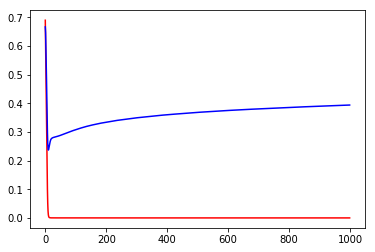

In [71]:
# Loss
plt.plot(history.history['loss'], "r")
plt.plot(history.history['val_loss'],"b")

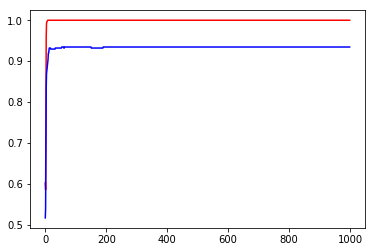

In [72]:
# acc
plt.plot(history.history['acc'], "r")
plt.plot(history.history['val_acc'],"b")

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               140100    
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 202       
Total params: 160,502
Trainable params: 160,502
Non-trainable params: 0
_________________________________________________________________


In [82]:
len(model.get_weights())

8